<a href="https://colab.research.google.com/github/psukphranee/Python-Practice/blob/master/SAR_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import os

#A. LFM Pulse

This section goes through the rundown of generating an LFM pulse. Dummy values are used. We define and visualize the pulse envelope and chirp separately and then we combine them by multiplying them together. 

### $P(t) = \chi_{\tau}(t) e^{j 2 \pi (f_c t + \frac{1}{2}k t^2)}$. (cite Cheney Here)

$\chi_{\tau}(t)$ piecewise function describing pulse envelope

$f_c$ = carrier frequency

$k$ = chirp rate


##1. Pulse Envelope Characteristic Function

Function describes envelope that LFM is "wrapped" in.

$
\chi_{\tau}(t)=
    \begin{cases}
        A & \text{if } t \in [0, \tau]\\
        0 & otherwise
    \end{cases}
$

We can achive the rectangular profile of $\chi$ by first considering the function $y = \left|\frac{1}{\tau_{.5}} t \right|$, giving us two lines intersecting $(\tau_{.5}, \pm1)$. The result is then booleanized giving us a rectangle of height $1$ and width $\tau := 2 \tau_{.5}$. We can then transform this rectangle by scaling and translating however we'd like.

##a. Code Outline

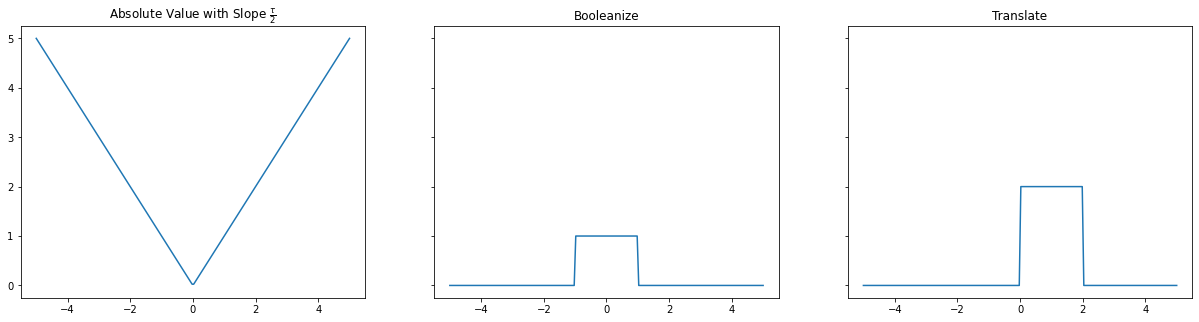

In [2]:
#Characteristic function, chi

# define pulse width tau and pulse height A
A = 2;
tau = 2; 
tau_half = tau/2;

#time
t = np.linspace(-5, 5, 200);
#pulse envelope
pre_chi_0 = np.abs((t)/tau_half);           #step 1
pre_chi_1 = np.abs((t)/tau_half) <= 1;      #step 2
chi = A * (np.abs((t-tau_half)/tau_half) <= 1);   #step 3

fig, ax = plt.subplots(1, 3, figsize=(21,5), sharey=True)
ax[0].plot(t, pre_chi_0)
ax[0].set_title(r'Absolute Value with Slope $\frac{\tau}{2}$')
ax[1].plot(t, pre_chi_1)
ax[1].set_title("Booleanize")
ax[2].plot(t, chi)
ax[2].set_title("Translate")

plt.show()

##b. Turn into a function

In [3]:
def generate_pulse_envelope(time, envelope_height, envelope_width):
    
  t = time
  A = envelope_height;
  tau = envelope_width; 
  tau_half= tau/2;

  chi = A * (np.abs((t-tau_half)/tau_half) <= 1); 

  return chi;


##2. LFM Signal

Dummy values used for visuals. Real and Imaginary part plotted.

### $e^{j 2 \pi (f_c t + \frac{1}{2}k t^2)}$.

$k = \frac{B}{\tau}$ ( $B$ bandwidth ).


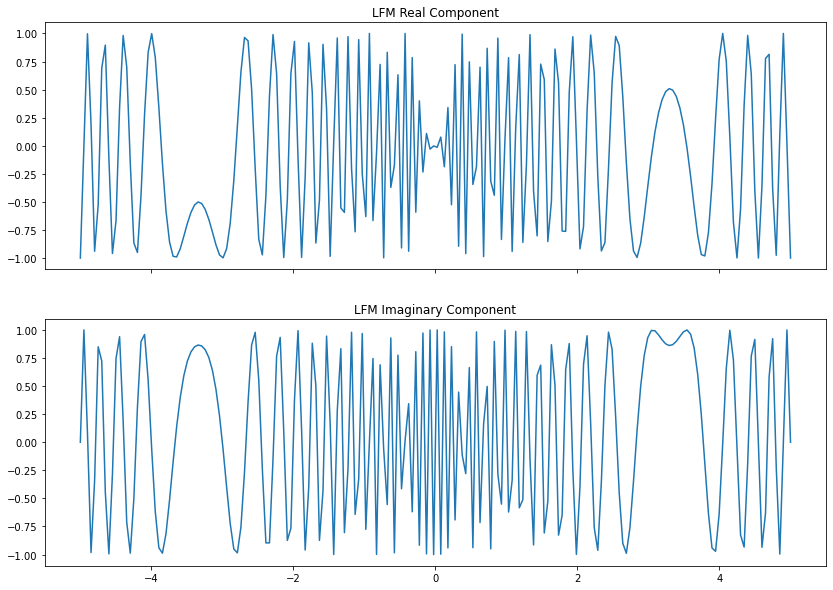

In [4]:
#LFM

#chirp rate
k = 3 
#carrier frequency
f_c = 10
#time intervals to be plotted along abscissa
t = np.linspace(-5, 5, 200) 
#argument to be passed to exponenetial 
exp_arg = 2j*np.pi*(f_c*t + .5*k*(t**2))
LFM = np.exp(exp_arg);

fig, ax = plt.subplots(2,1, figsize=(14,10), sharex=True)
ax[0].plot(t, np.real(LFM))
ax[1].plot(t, np.imag(LFM))

ax[0].set_title("LFM Real Component")
ax[1].set_title("LFM Imaginary Component")
plt.show()

##3. Product

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


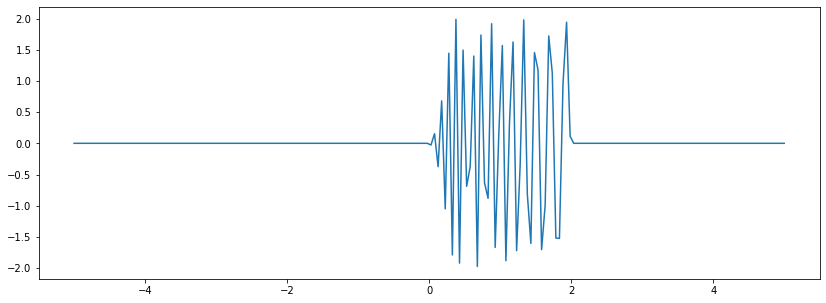

In [5]:
pulse = chi*LFM # multiplication of two previously pre-processed outputs

plt.figure(figsize=(14,5))
plt.plot(t, pulse)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


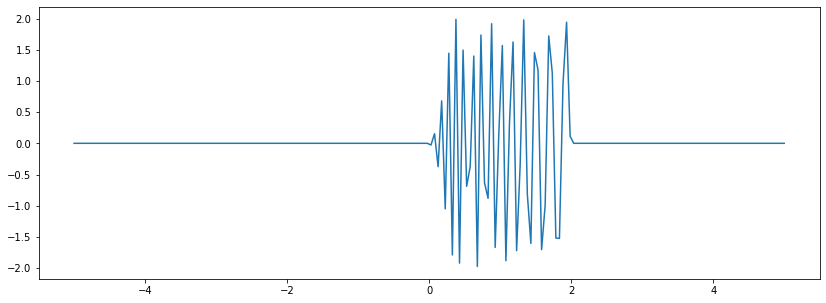

In [6]:
pulse = (A * (np.abs((t-tau_half)/tau_half) <= 1)) * (np.exp(2j*np.pi*(f_c*t + .5*k*(t**2)))) #pulse function P_tau(t)

plt.figure(figsize=(14,5))
plt.plot(t, pulse)
plt.show()

###a. Define as a Function

In [7]:
def generate_LFM_Pulse(time_array, pulse_width, pulse_height, chirp_rate=1, carrier_frequency=100):
  
  #time ---------------
  t = time_array

  #pulse envelope  ---------------
  A = pulse_height;
  tau = pulse_width; 
  tau_half = tau/2;

  chi = A * (np.abs((t-tau_half)/tau_half) <= 1);
  #chi = generate_pulse_envelope(t, pulse_height, pulse_width);

  #LFM  ---------------
  k = chirp_rate
  f_c = carrier_frequency

  #argument to be passed to exponenetial 
  exp_arg = 2j*np.pi*(f_c*t + .5*k*(t**2))
  LFM = np.exp(exp_arg);

  pulse = chi*LFM
  return pulse

###b. Test LFM Function

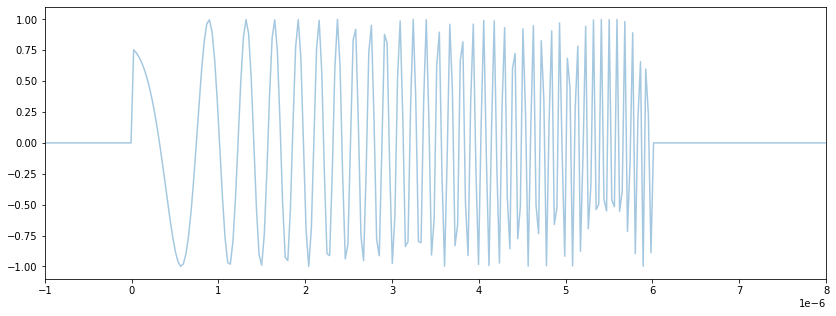

In [8]:
###
PRF = 500 #GHz
tau = 6e-6 #seconds
f_c = 1e10
bandwidth = 20 #Ghz
k = 2e12

t = np.linspace(-1e-6,8e-6, 300)

pulse1 = generate_LFM_Pulse(t, pulse_width=tau, pulse_height=1, carrier_frequency=f_c, chirp_rate=k )
# pulse2 = generate_LFM_Pulse(t, 1, 1, 20, 1e9)
# pulse3 = generate_LFM_Pulse(t, 2, 1, 20, 1e9)

plt.figure(figsize=(14,5))
plt.plot(t, np.real(pulse1), alpha=0.4)
# plt.plot(t, pulse2, alpha=0.2)
# plt.plot(t, pulse3, alpha=0.2)
plt.xlim([t[0],t[-1]])
# plt.ylim(min(pulse), max(pulse))
plt.show()

###4. Pulse Plotting Function

In [38]:
def plot_pulse(time, pulse, ax, **kwargs):
  t=time;
  pulse=pulse;

  # plt.figure(figsize=(14,5))
  ax.plot(t, np.real(pulse), alpha=0.4, *kwargs)
  # ax.xlim([t[0],t[-1]])
  # ax.show()

#B. Geometry

Mounted at /content/drive


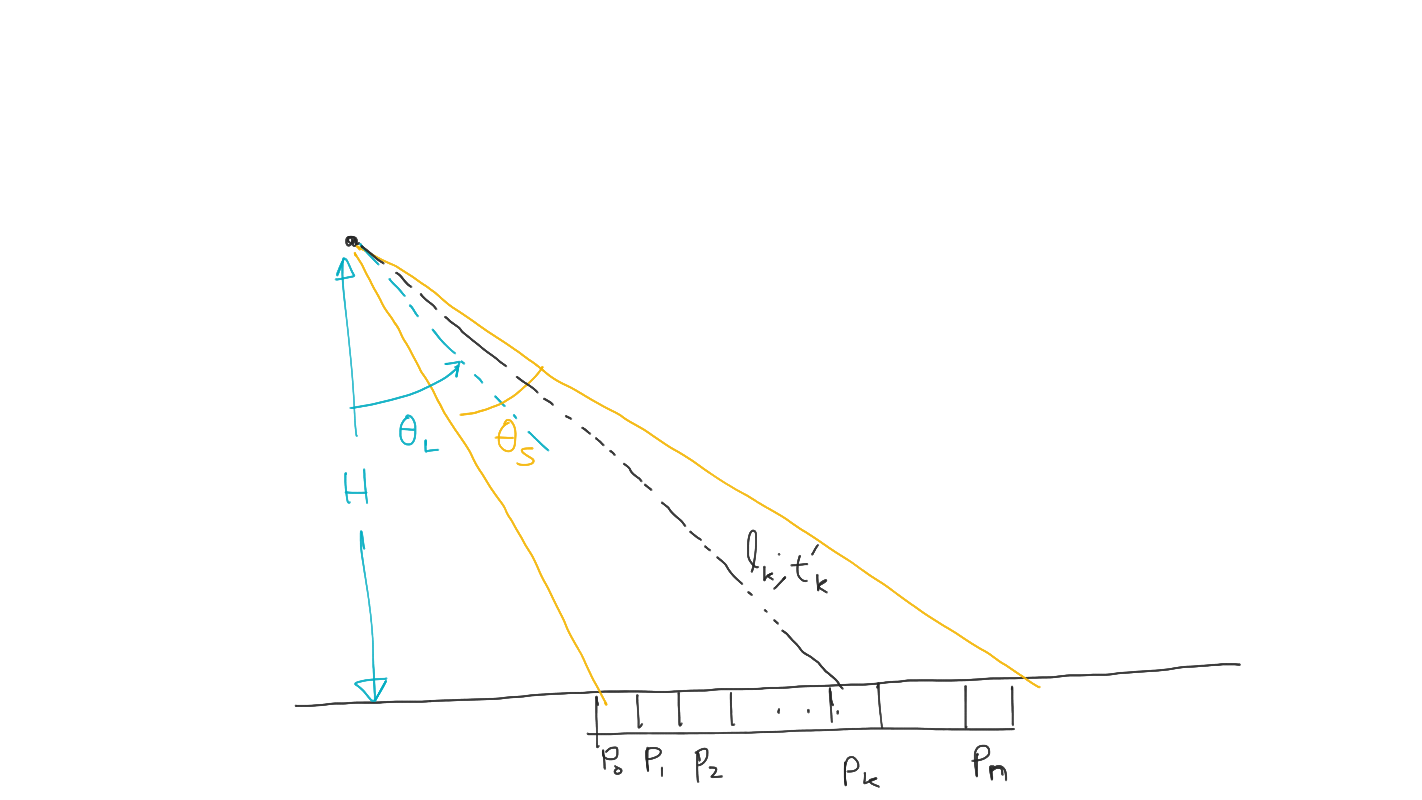

In [10]:
from IPython.display import Image

from google.colab import drive
drive.mount('/content/drive')

Image(filename="drive/MyDrive/Colab Notebooks/sar.png")

###1. Define matrices associated with geometry


In [11]:
#define some dummy values first
c_0 = 100 #supposed to be speed of light, but dummy values for now

#angles
theta_L = np.pi/2 #Look angle
theta_S = np.pi/12 #swatch angle. 3dB angle of sinc function

#calculated values from angles
theta_S_half = theta_S/2;
theta_lower = theta_L - theta_S_half;
theta_upper = theta_L + theta_S_half;

#height
H = 100

#step blocks
n = 10 #number of divisions p_k

#array of values corresponding to each subinterval
theta = np.linspace(theta_lower, theta_upper, n)
d = H*theta
t_delay = d/c_0

###a. Test out code. Pulse reflected from each part of the ground is a time delayed signal. Superimpose them. 

*   Plot time delayed signals superimposed. Adjust opacity for easier visual.







In [12]:
t = np.linspace(-1, 5, 500)

#Dummy values
#chirp rate
k = 3 
#carrier frequency
f_c = 10

time_matrix = np.zeros((3, t.shape[0])) #matrix to store times and their delays

time_matrix[0, :] = t-t_delay[0]
time_matrix[1, :] = t-t_delay[1]
time_matrix[2, :] = t-t_delay[2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


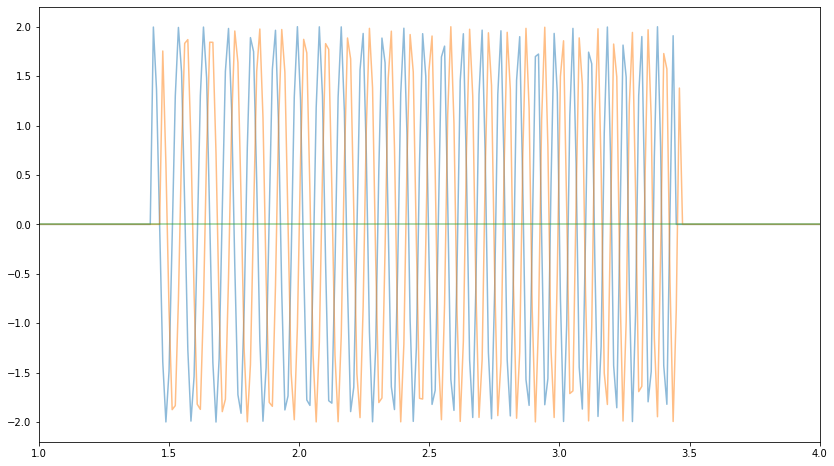

In [13]:
#reuse time variable t from previous cell
pulse = np.zeros((3, t.shape[0]))

pulse[0] = (A * (np.abs((time_matrix[0,:] -tau_half)/tau_half) <= 1)) * (np.exp(2j*np.pi*(f_c*time_matrix[0,:]  + .5*k*(time_matrix[0,:] **2)))) #pulse function P_tau(t)
pulse[1] = (A * (np.abs((time_matrix[1,:] -tau_half)/tau_half) <= 1)) * (np.exp(2j*np.pi*(f_c*time_matrix[1,:]  + .5*k*(time_matrix[1,:] **2)))) #pulse function P_tau(t)
#pulse[2] = (A * (np.abs((time_matrix[2,:] -tau_half)/tau_half) <= 1)) * (np.exp(2j*np.pi*(f_c*time_matrix[2,:]  + .5*k*(time_matrix[2,:] **2)))) #pulse function P_tau(t)
pulse[2] = generate_LFM_Pulse(t, tau, 2, k, f_c)

plt.figure(figsize=(14,8))
plt.plot(t, pulse[0], alpha=0.5)
plt.plot(t, pulse[1], alpha=0.5)
plt.plot(t, pulse[2], alpha=0.5)
plt.xlim([1,4])
plt.show()



*   Plot the superposition of the signals


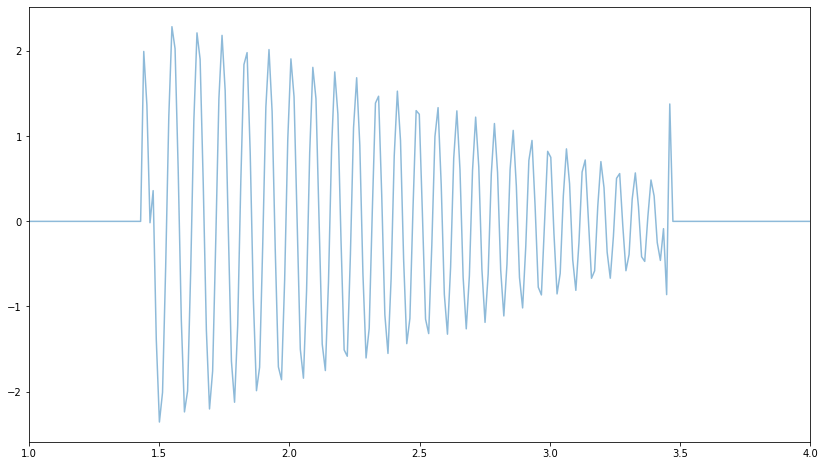

In [14]:
pulse_sum = pulse[0] + pulse[1] + pulse[2]
plt.figure(figsize=(14,8))
plt.plot(t, pulse_sum, alpha=0.5)
plt.xlim([1,4])
plt.show()

###b. Superimpose Time Delays

1.   time_matrix NxM; rows correspond to time delay from each ground element;
2.   pulse also NxM; each row corresponding to signal repulsed. ie pulse generated from rows of time_matrix
3.   sum pulse into pulse_sum representing superposition of signals detected at antenna




In [15]:
### fix diagram n should be n-1.

t = np.linspace(-1, 5, 500)

time_matrix = np.zeros((len(t_delay), t.shape[0])) #matrix to store times and their delays

for i in range(len(t_delay)):
  time_matrix[i, :] = t-t_delay[i]

time_matrix.shape

(10, 500)

In [16]:
pulse = np.zeros((len(t_delay), t.shape[0]))

#Dummy values
#chirp rate
tau = 2
k = 3 
f_c = 10

for i in range(len(t_delay)):
  pulse[i, :] = generate_LFM_Pulse(time_matrix[i,:], tau, 2, k, f_c)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.


In [17]:
pulse_sum = pulse.sum(axis=0)
pulse_sum.shape

(500,)

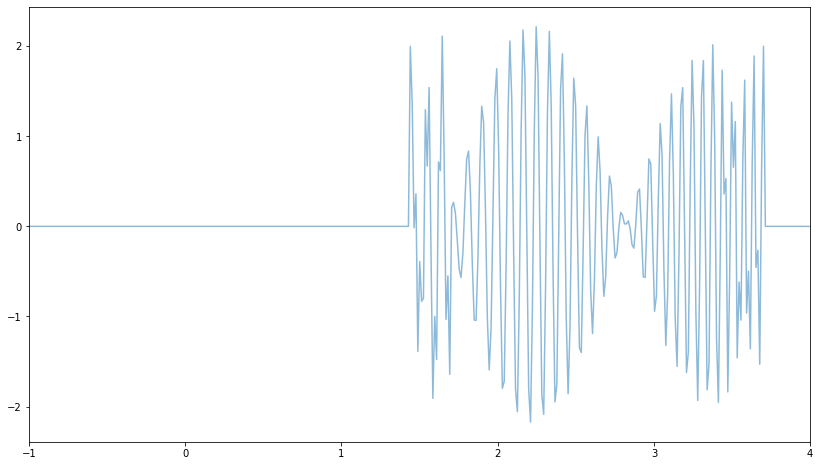

In [18]:
#chirp rate
k = 3 
#carrier frequency
f_c = 10

plt.figure(figsize=(14,8))

plt.plot(t, pulse_sum, alpha=0.5)

plt.xlim([-1,4])
plt.show()

#C. Sampling

So far, all of the functions seem to be working. Next is sampling. The above workflow generates the superposition of delayed signals relflected from the ground. For visuals and testing purposes, the resolution is up to how us; however many datapoints we specify in the linspace function. 

In the next parts, we limit the amount of data points to emulate sampling .

The carrier signal above is defined as $f_c$. Over pulse interval $\tau$, the pulse frequency is bounded by $f_m = 2j \pi (f_c \tau + .5k{\tau}^2)$. Therefore, the sampling rate should be $f_s \geq 2f_m$. I believe we can expand the listening time in lieu of the sampling frequency. With a listening time much longer than the pulse width, we can sample different parts of the pulse. 

(Bu-Chin Wang book pg 19)

##1. Test Pulse Train Code. Duty cycle 10% with pulse. Create a pulse train and. We use convenient dummy values.

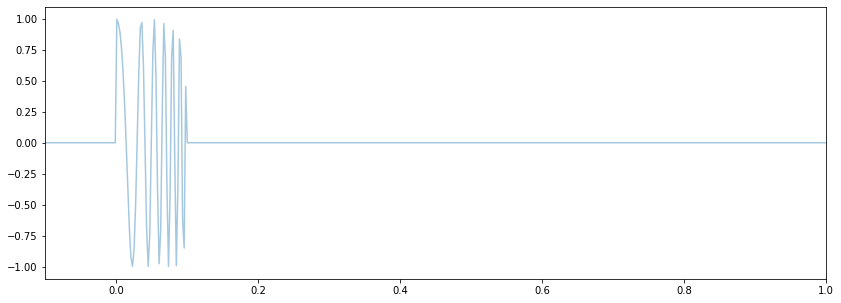

In [19]:
t = np.linspace(-.1,1,500)
pulse = generate_LFM_Pulse(t, pulse_width=.1, pulse_height=1, chirp_rate=1000, carrier_frequency=10)
plot_pulse(t, pulse)

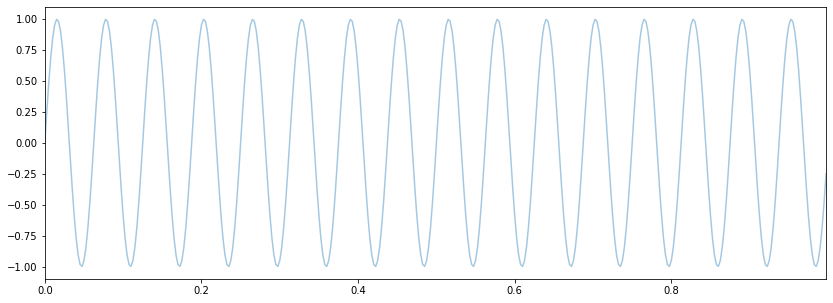

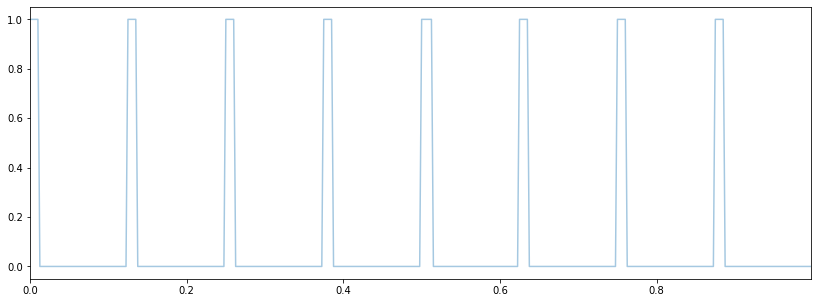

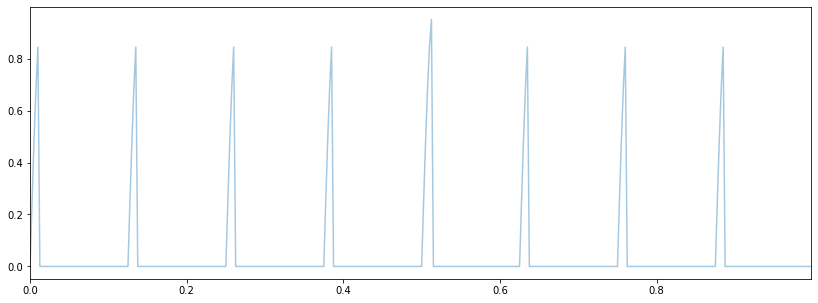

In [22]:
#how do i createa a repeating pulse?
#dont reinvent the wheel
from scipy import signal

f_p = 8 #pulse frequency
w_p = 2*np.pi*f_p #angular frequency
T_p = 1/f_p #period

t = np.linspace(0, 1, 400, endpoint=False)
# display(t, t%f_p);

pulse_train = (1/2)*signal.square(2 * np.pi * f_p * t, duty=0.1)
pulse_train = pulse_train - min(pulse_train) #vertical offset and scale

sin = np.sin(2*w_p * (t % T_p))

plot_pulse(t, sin)
plot_pulse(t, pulse_train)
plot_pulse(t, pulse_train*sin)



##2. LFM Pulse Train

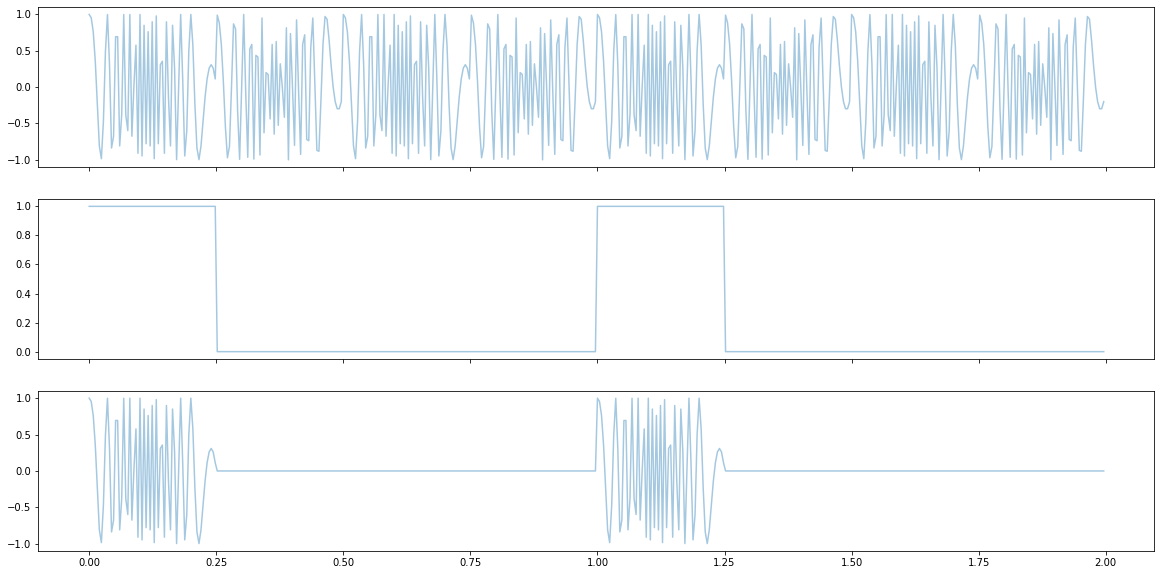

In [63]:
f_p = 1 #pulse frequency
w_p = 2*np.pi*f_p #angular frequency
T_p = 1/f_p #period of pulse envelope
duty_cycle = 0.25

t = np.linspace(0, 2, 500, endpoint=False)
t_modulus = t % (T_p*duty_cycle);
# display(t, t%f_p);

pulse_train = (1/2)*signal.square(2 * np.pi * f_p * t, duty=duty_cycle)
pulse_train = pulse_train - min(pulse_train) #vertical offset and scale

lfm_train = generate_LFM_Pulse(time_array=t_modulus, pulse_width=(T_p)*duty_cycle, chirp_rate=1000, carrier_frequency=10, pulse_height=1)

fig, ax = plt.subplots(3, 1, sharex=True, figsize=(20,10))
plot_pulse(t, lfm_train, ax=ax[0])
plot_pulse(t, pulse_train, ax=ax[1])
plot_pulse(t, pulse_train*lfm_train, ax=ax[2])